In [7]:
import numpy as np 
import pandas as pd
import os

In [8]:
musicVec = np.loadtxt('../Data/MusicVec.txt', delimiter=',')

In [9]:
musicVec.shape

(1500, 128)

In [10]:
len(musicVec)

1500

In [11]:
def chooseSimMus(zs):
    musInputList = list(range(0, 1500))
    n = len(musInputList)
    #n = 5
    topn = 11
    #figure1 = np.zeros((img_height*n, img_weight*topn, 3))
    #figure2 = np.zeros((img_height*n, img_weight*topn, 3))
    #zs_ = zs / (zs**2).sum(1, keepdims=True)**0.5
    similar_list = []
    for i , one in zip(range(n), musInputList):
        #one = 0 #测试选择0号
        #one = np.random.choice(len(x_train)) #随机选择一张图的序号
        idxs = ((zs**2).sum(1) + (zs[one]**2).sum() - 2 * np.dot(zs, zs[one])).argsort()[:topn] #返回最相似序列
        similar = [one, idxs.tolist()]
        similar_list.append(similar)
    return similar_list

def randomSimMus(zs):
    #musInputList = [236, 344, 407, 426, 744, 214, 1977, 1675, 1535, 1371]
    n = 1
    topn = 11
    #figure1 = np.zeros((img_height*n, img_weight*topn, 3))
    #figure2 = np.zeros((img_height*n, img_weight*topn, 3))
    zs_ = zs / (zs**2).sum(1, keepdims=True)**0.5
    similar_list = []
    for i in range(n):
        one = np.random.choice(len(zs)) #随机选择一张图的序号
        idxs = ((zs**2).sum(1) + (zs[one]**2).sum() - 2 * np.dot(zs, zs[one])).argsort()[:topn]
        similar = [one, idxs.tolist()]
        similar_list.append(similar)
    return similar_list

In [12]:
musicVec[0].shape

(128,)

In [13]:
similar_list = randomSimMus(musicVec)
similar_list

[[247, [247, 1225, 673, 951, 289, 109, 1179, 219, 304, 1162, 1014]]]

In [14]:
similar_dic = {}
for img_id, name_list in similar_list:
    similar_dic[img_id] = name_list
similar_dic

{247: [247, 1225, 673, 951, 289, 109, 1179, 219, 304, 1162, 1014]}

In [15]:
similar_arr = pd.DataFrame(similar_dic)

In [16]:
similar_arr.to_csv('SimilaryMusicIndex.csv', index=False)
similar_arr

247
0    247
1   1225
2    673
3    951
4    289
5    109
6   1179
7    219
8    304
9   1162
10  1014

In [17]:
img_ind_data = pd.read_csv('SimilaryMusicIndex.csv')
tarImgs = img_ind_data.columns.tolist()
img_data = pd.read_csv('../Data/nameIndex.csv', names=['id', 'name'])
img_data.head()

id                                       name
0   0  Drop Tower - Pluto (Drop Tower Remix).mp3
1   1                          iris - Letter.mp3
2   2                                 Hey Oh.mp3
3   3                        Let Me Love You.mp3
4   4                 Kelly Sweet-We Are One.mp3

In [18]:
Music_dic = {}

In [19]:
for img_id in tarImgs:
    targetImg = img_data[img_data['id']==int(img_id)]
    targetImgName = targetImg['name'].values[0]
    simImgs = img_ind_data[img_id].values.tolist()
    print("Input Image name is:"+'\n', targetImgName)
    print('Similar Image name is:')
    Music_dic[targetImgName] = []
    for sims in simImgs:
        #print(sims)
        simImage = img_data[img_data['id']==int(sims)]
        simName = simImage['name'].values[0]
        Music_dic[targetImgName].append(simName)
        print('\t' + os.path.join('/home/bob/Music/music_dataset', simName))
    print('\n')

Input Image name is:
 DJ Okawari - Flower Dance.mp3
Similar Image name is:
	/home/bob/Music/music_dataset/DJ Okawari - Flower Dance.mp3
	/home/bob/Music/music_dataset/Flower Dance.mp3
	/home/bob/Music/music_dataset/Anthem Lights - Best of 2012： Payphone Call Me Maybe Wide Awake Starship We Are Young.mp3
	/home/bob/Music/music_dataset/Sweet Dream.mp3
	/home/bob/Music/music_dataset/Sia;Sean Paul-Cheap Thrills.mp3
	/home/bob/Music/music_dataset/Snigellin - Good Night.mp3
	/home/bob/Music/music_dataset/Sia,Sean Paul - Cheap Thrills.mp3
	/home/bob/Music/music_dataset/Heatstroke.mp3
	/home/bob/Music/music_dataset/Chasjam - Zippo.flac
	/home/bob/Music/music_dataset/DAISHI DANCE,Cecile Corbel - Take me hand.flac
	/home/bob/Music/music_dataset/Take me hand.mp3




In [84]:
for name in Music_dic.values():
    print(name)

['Mandisa - Dear John.mp3', 'John Mayer - Heartbreak Warfare.mp3', 'Linkin Park - In The End.mp3', 'Kjartan Salvesen-Then Silence.mp3', 'Rameses B - Night Sky.mp3', 'Robert de Boron - Chiru (Saisei no Uta).mp3', 'Rameses B - Night Sky.flac', 'Lana Del Rey-Young & Beautiful.mp3', 'Navi - If.mp3', 'Fun.,Janelle Monáe - We Are Young.flac', 'Stand.mp3']


# ---------------------------------------------------------------------

In [5]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [6]:
X_embedded = TSNE(n_components=2, init='pca').fit_transform(musicVec)

In [7]:
X_t = TSNE(n_components=2).fit_transform(musicVec)

In [8]:
X_3 = TSNE(n_components=3).fit_transform(musicVec)

In [6]:
X_embedded.shape

(1500, 2)

In [19]:
X.shape

(1500, 2)

In [ ]:
def normolization(X):
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)
    return X_norm

In [9]:
def plot_embedding_2d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1],'.',
                 color=plt.cm.Set1(1 / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

#%%
#将降维后的数据可视化,3维
def plot_embedding_3d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i,2],'.',
                 color=plt.cm.Set1(1 / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

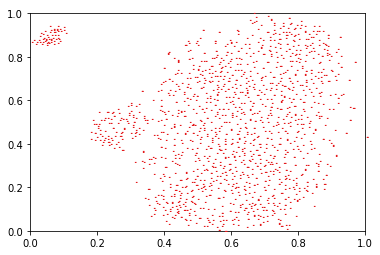

In [10]:
plot_embedding_2d(X_t)

In [11]:
plot_embedding_3d(X_3)

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

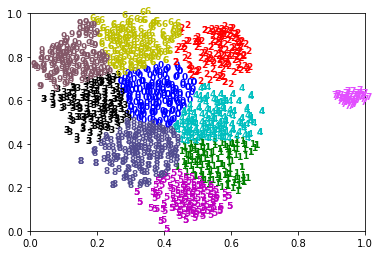

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = X_embedded
#坐标缩放到[0,1]区间
x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
X = (X - x_min) / (x_max - x_min)

n_clusters = 10
clf = KMeans(n_clusters, n_init=20)
clf.fit(X_embedded)
cents = clf.cluster_centers_
labels = clf.labels_
#sse = clf.s
#画出聚类结果，每一类用一种颜色
colors = ['b','g','r','k','c','m','y','#e24fff','#524C90','#845868',
         'b','g','r','k','c','m','y','#e24fff','#524C90','#845868']
for i in range(n_clusters):
    index = np.nonzero(labels==i)[0]
    x0 = X[index,0]
    x1 = X[index,1]
    y_i = labels[index]
    for j in range(len(x0)):
        plt.text(x0[j],x1[j],str(int(y_i[j])),color=colors[i],\
                fontdict={'weight': 'bold', 'size': 9})
    #plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],linewidths=12)
#plt.title("SSE={:.2f}".format(sse))
#plt.axis([-30,30,-30,30])
plt.show()

NameError: name 'title' is not defined

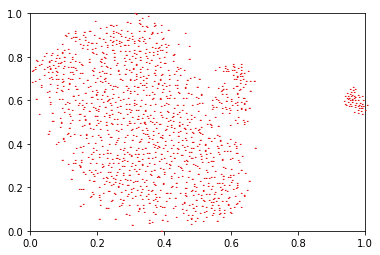

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = X_embedded
#坐标缩放到[0,1]区间
x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
X = (X - x_min) / (x_max - x_min)

#降维后的坐标为（X[i, 0], X[i, 1]），在该位置画出对应的digits
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(X.shape[0]):
    ax.text(X[i, 0], X[i, 1],'.',
             color=plt.cm.Set1(1 / 10.),
             fontdict={'weight': 'bold', 'size': 9})


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = X_embedded


n_clusters = 15
clf = KMeans(n_clusters, n_init=20)
clf.fit(X_embedded)
cents = clf.cluster_centers_
labels = clf.labels_
#sse = clf.s
#画出聚类结果，每一类用一种颜色
colors = ['b','g','r','k','c','m','y','#e24fff','#524C90','#845868',
         'b','g','r','k','c','m','y','#e24fff','#524C90','#845868']
for i in range(n_clusters):
    index = np.nonzero(labels==i)[0]
    x0 = X[index,0]
    x1 = X[index,1]
    y_i = labels[index]
    for j in range(len(x0)):
        plt.text(x0[j],x1[j],str(int(y_i[j])),color=colors[i],\
                fontdict={'weight': 'bold', 'size': 9})
    #plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],linewidths=12)
#plt.title("SSE={:.2f}".format(sse))
#plt.axis([-30,30,-30,30])
plt.savefig('/home/bob/Desktop/1.jpg')
plt.show()
